In [12]:

'''
Import dependent packages & setup environments
'''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb


pd.set_option('display.max.colwidth', 50)
pd.set_option('display.width', 1000)

In [13]:
'''
Load Data 
'''

# Materials to use
materials = ["PC", "PA66", "ABS", "PCSMOG", "TPU"]

# Load raw dataset
raw_dataset = pd.read_excel('../../data/iae/injection_mold_5000_v1.xlsx', header=0, index_col=False)
print("> Raw Dataset Size : {}".format(len(raw_dataset)))

# Featureset
feature_set = ["weight", "failure", "material", "set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]
print("> Selected Featureset Size : {}".format(len(feature_set)))

''' 
Data separation for each materials
'''
# for PC
pc_dataset = raw_dataset.loc[raw_dataset['material'] == "PC"][["weight", "failure"]].dropna()
pc_dataset_positive = pc_dataset.where(pc_dataset["failure"]==0).dropna()
pc_dataset_negative = pc_dataset.where((pc_dataset["failure"]==1) | (pc_dataset["failure"]==2) | (pc_dataset["failure"]==3)).dropna()

# for pc66
pa66_dataset = raw_dataset.loc[raw_dataset['material'] == "PA66"][["weight", "failure"]].dropna()
pa66_dataset_positive = pa66_dataset.where(pa66_dataset["failure"]==0).dropna()
pa66_dataset_negative = pa66_dataset.where((pa66_dataset["failure"]==1) | (pa66_dataset["failure"]==2) | (pa66_dataset["failure"]==3)).dropna()

# for ABS
abs_dataset = raw_dataset.loc[raw_dataset['material'] == "ABS"][["weight", "failure"]].dropna()
abs_dataset_positive = abs_dataset.where(abs_dataset["failure"]==0).dropna()
abs_dataset_negative = abs_dataset.where((abs_dataset["failure"]==1) | (abs_dataset["failure"]==2) | (abs_dataset["failure"]==3)).dropna()

# for PCSMOG
pcsmog_dataset = raw_dataset.loc[raw_dataset['material'] == "PCSMOG"][["weight", "failure"]].dropna()
pcsmog_dataset_positive = pcsmog_dataset.where(pcsmog_dataset["failure"]==0).dropna()
pcsmog_dataset_negative = pcsmog_dataset.where((pcsmog_dataset["failure"]==1) | (pcsmog_dataset["failure"]==2) | (pcsmog_dataset["failure"]==3)).dropna()

# for TPU
tpu_dataset = raw_dataset.loc[raw_dataset['material'] == "TPU"][["weight", "failure"]].dropna()
tpu_dataset_positive = tpu_dataset.where(tpu_dataset["failure"]==0).dropna()
tpu_dataset_negative = tpu_dataset.where((tpu_dataset["failure"]==1) | (tpu_dataset["failure"]==2) | (tpu_dataset["failure"]==3)).dropna()


> Raw Dataset Size : 4977
> Selected Featureset Size : 28


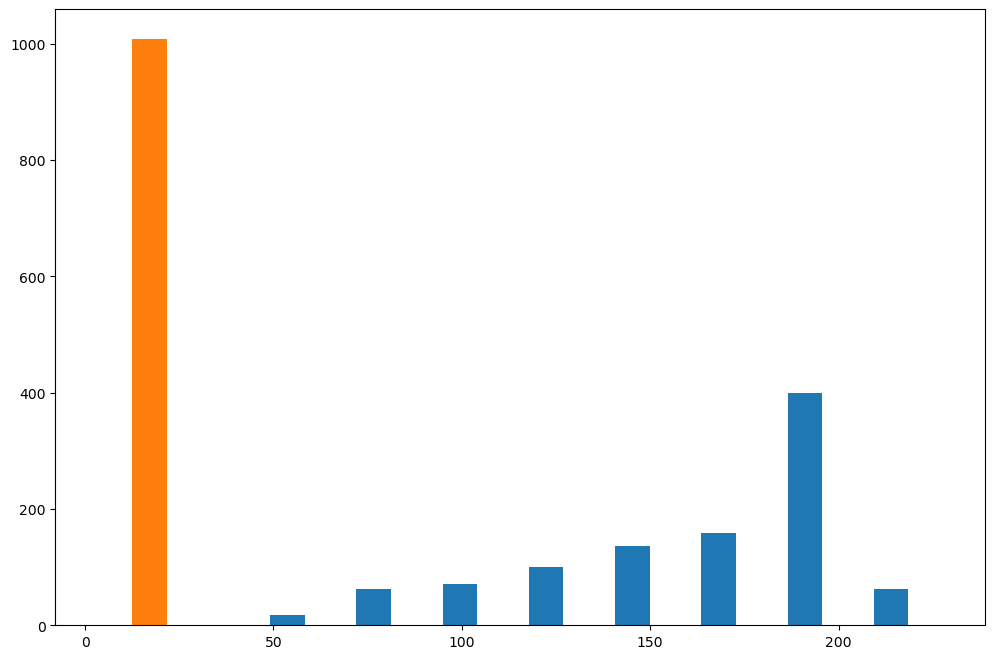

In [18]:
'''
Draw Raw Data Plot
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.hist(pc_dataset_negative.dropna())
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x154866580>,
 'caps': [<matplotlib.lines.Line2D at 0x154866b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1548662b0>,
 'medians': [<matplotlib.lines.Line2D at 0x154872100>,
 'fliers': [<matplotlib.lines.Line2D at 0x1548726a0>,
 'means': [<matplotlib.lines.Line2D at 0x1548723d0>,
  <matplotlib.lines.Line2D at 0x15487da90>]}

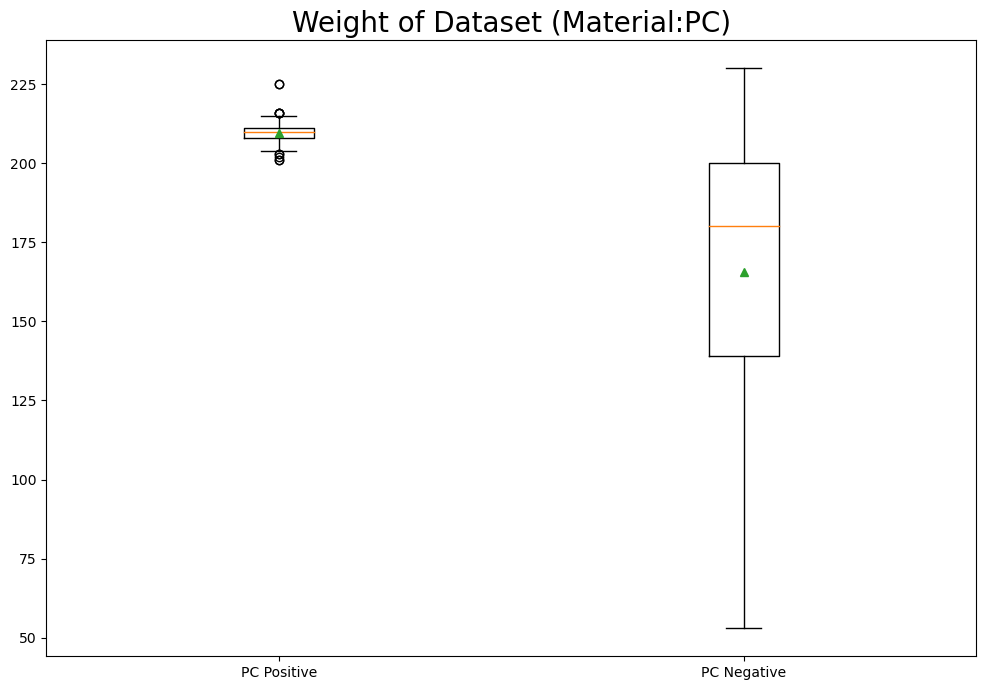

In [11]:
''' 
IQR visualization of raw data for each material
'''
import matplotlib.pyplot as plt


# for PC
plt.figure(figsize=(12,8))
plt.title("Weight of Dataset (Material:PC)", fontsize=20)
plt.boxplot([pc_dataset_positive["weight"], pc_dataset_negative["weight"]], labels=['PC Positive', 'PC Negative'], showmeans=True)

# for PA66
plt.figure(figsize=(12,8))
plt.title("Weight of Dataset (Material:PA66)", fontsize=20)
plt.boxplot([pa66_dataset_positive["weight"], pa66_dataset_negative["weight"]], labels=['PA66 Positive', 'PA66 Negative'], showmeans=True)

# ABS
plt.figure(figsize=(12,8))
plt.title("Weight of Dataset (Material:ABS)", fontsize=20)
plt.boxplot([abs_dataset_positive["weight"], abs_dataset_negative["weight"]], labels=['ABS Positive', 'ABS Negative'], showmeans=True)

# PCSMOG
plt.figure(figsize=(12,8))
plt.title("Weight of Dataset (Material:PCSMOG)", fontsize=20)
plt.boxplot([pcsmog_dataset_positive["weight"], pcsmog_dataset_negative["weight"]], labels=['PCSMOG Positive', 'PCSMOG Negative'], showmeans=True)

# TPU
plt.figure(figsize=(12,8))
plt.title("Weight of Dataset (Material:TPU)", fontsize=20)
plt.boxplot([tpu_dataset_positive["weight"], tpu_dataset_negative["weight"]], labels=['TPU Positive', 'TPU Negative'], showmeans=True)





# Box-whisker Plot for positive data distribution visualization
# plt.figure(figsize=(12,8))
# plt.title("Weight of Positive Dataset")
# box = plt.boxplot([pc_dataset_positive["weight"], pa66_dataset_positive["weight"], abs_dataset_positive["weight"], pcsmog_dataset_positive["weight"], tpu_dataset_positive["weight"]], labels=['PC', 'PA66', 'ABS', 'PCSMOG', 'TPU'], showmeans=True)

# Box-whisker Plot for positive data distribution visualization
# plt.figure(figsize=(12,8))
# plt.title("Weight of Negative Dataset")
# box = plt.boxplot([pc_dataset_negative["weight"], pa66_dataset_negative["weight"], abs_dataset_negative["weight"], pcsmog_dataset_negative["weight"], tpu_dataset_negative["weight"]], labels=['PC', 'PA66', 'ABS', 'PCSMOG', 'TPU'], showmeans=True)

# show numbers
# whiskers = [item.get_ydata() for item in box['whiskers']]
# medians = [item.get_ydata() for item in box['medians']]
# fliers = [item.get_ydata() for item in box['fliers']]

# print('whiskers:', whiskers)
# print('medians:', medians)
# print('fliers:', fliers)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(positive_X, np.ravel(positive_y), test_size=0.33, shuffle=True)
model = RandomForestRegressor(max_depth=10, max_features=5, oob_score=False, bootstrap=False).fit(X_train, y_train)
#model = BaggingRegressor(base_estimator=None, max_features=5).fit(X_train, y_train)

y_pred_trainset = model.predict(X_train)
y_pred_testset = model.predict(X_test)

#print("Trainset R2 Score :", (r2_score(y_train, y_pred_trainset))) 
#print("Testset R2 Score :", (r2_score(y_test, y_pred_testset)))
# print("Number of Train Samples : ", len(X_train))

print("* K-fold Cross validation scores :")
scores = cross_val_score(model, positive_X, np.ravel(positive_y), cv=5, scoring="neg_mean_absolute_percentage_error")*-100
print(scores)
print("Average MAPE : %0.2f %%"%scores.mean())
#print("Average Score : %0.2f (standard deviation : %0.2f)"% scores.mean(), scores.std())
#print("* %0.2f accuracy with a standard deviation of %0.2f" % scores.mean(), scores.std())

# feature importances
# prediction = model.predict(X_train)
# print(mean_squared_error(y_train, y_pred_trainset))
# print("* Mean Absolute Percentage Error (@positive, trainset) : ", mean_absolute_percentage_error(y_train, y_pred_trainset)*100)
# print("* Mean Absolute Percentage Error (@positive, testset) : ", mean_absolute_percentage_error(y_test, y_pred_testset)*100)
# print("Train : ", y_test)
# print("Train Predict : ", y_pred_testset)
# featureImportance = model.feature_importances_

# feature importance (ordering)
# featureImportance = featureImportance/featureImportance.max()
# sorted_idx = np.argsort(featureImportance)
# barPos = np.arange(sorted_idx.shape[0])+.5
# plt.barh(barPos, featureImportance[sorted_idx], align='center')
# plt.yticks(barPos, data_columns[sorted_idx])
# plt.xlabel('Variable Importance')
# plt.show()



* K-fold Cross validation scores :
[1.15735743 0.80235066 0.5439829  0.41387917 0.31971267]
Average MAPE : 0.65 %


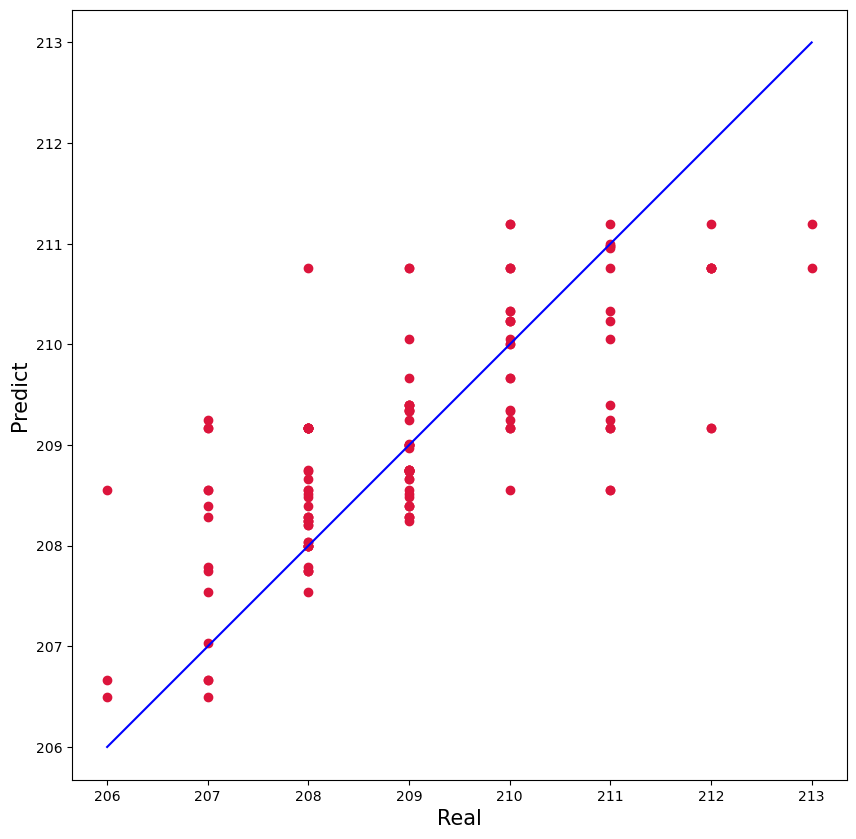

In [20]:
# visualization for trainset

plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_trainset, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred_trainset), max(y_train))
p2 = min(min(y_pred_trainset), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real', fontsize=15)
plt.ylabel('Predict', fontsize=15)
plt.axis('equal')
plt.show()

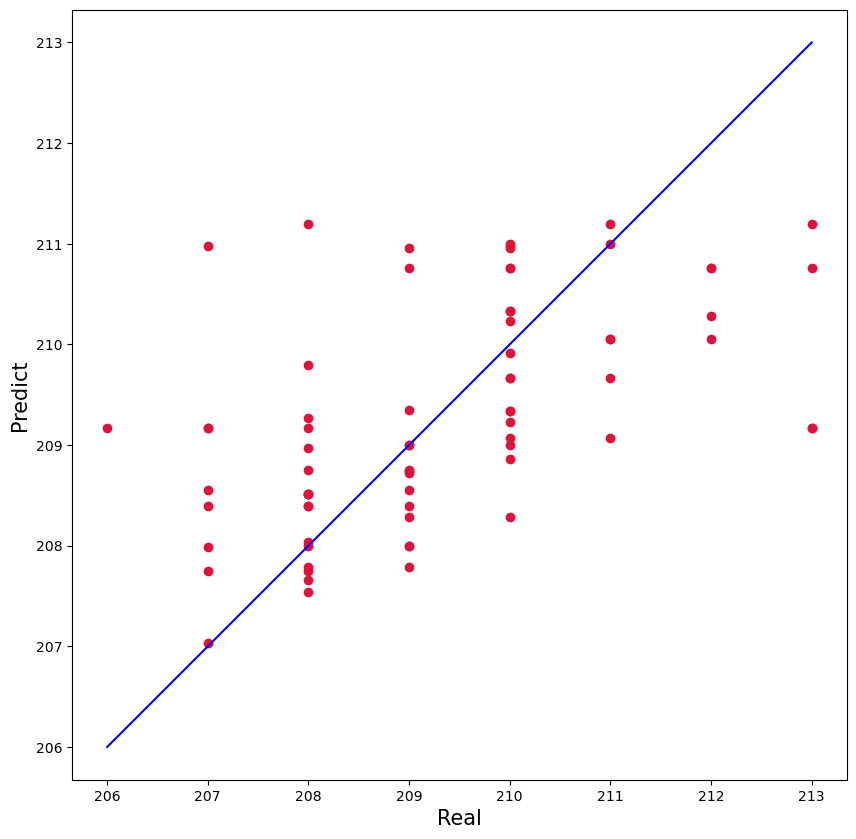

In [21]:
# visualization for trainset

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_testset, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred_testset), max(y_train))
p2 = min(min(y_pred_testset), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real', fontsize=15)
plt.ylabel('Predict', fontsize=15)
plt.axis('equal')
plt.show()